## PCA

In [28]:
import pprint
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans  

import seaborn as sns
sns.set_style("white")
fig_w = 2530
fig_h = 1900
my_dpi=200

plt.style.use('ggplot')

from matplotlib import rcParams
# plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

plt.rc('font', family='BabelStone Han', size=13) # 选择你自己电脑上的字体

In [7]:
path = '../../../OneDrive - University of New Mexico/data/mybilividdata/'
file_list = [ 'vid_data_1_2000000.csv', 'vid_data_2000000_4000000.csv', 'vid_data_4000000_6000000.csv', 'vid_data_6000000_8000000.csv', 'vid_data_8000000_10000000.csv', 'vid_data_10000000_12000000.csv', 'vid_data_12000000_14000000.csv', 'vid_data_14000000_16000000.csv', 'vid_data_16000000_18000000.csv', 'vid_data_18000000_20000000.csv', 'vid_data_20000000_22000000.csv', 'vid_data_22000000_24000000.csv' ]

In [8]:
df = pd.read_csv( path + file_list[0] )

In [9]:
all_col = df.columns.values

In [10]:
features = all_col[1:]
target = all_col[0]

In [11]:
features,\
target

(array(['view', 'danmaku', 'reply', 'favorite', 'coin', 'share',
        'now_rank', 'his_rank', 'like'], dtype=object), 'aid')

In [12]:
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,[target]].values

In [13]:
x = StandardScaler().fit_transform(x)

/Users/leima/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [14]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

# pca = PCA(n_components=3)
# principalComponents = pca.fit_transform(x)
# principalDf = pd.DataFrame(data = principalComponents
#              , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

In [15]:
pca.components_

array([[ 0.3624075 ,  0.28913785,  0.37257662,  0.41811189,  0.39783544,
         0.39282233,  0.01296399,  0.01513973,  0.39805718],
       [-0.44998449, -0.64684732, -0.18622529,  0.15001324,  0.25679961,
         0.22055844,  0.06018204, -0.14995116,  0.42569869]])

In [16]:
pca.explained_variance_ratio_

array([0.47940217, 0.12554222])

In [17]:
finalDf = pd.concat([principalDf, df[[target]]], axis = 1)

In [18]:
finalDf.head()

,principal component 1,principal component 2,aid
0,8.460307,2.891637,100
1,10.400698,-0.281312,12
2,6.625780,1.276336,16
3,35.220048,10.131961,2
4,7.543968,1.193221,20


In [19]:
plottingDf = finalDf[::1]

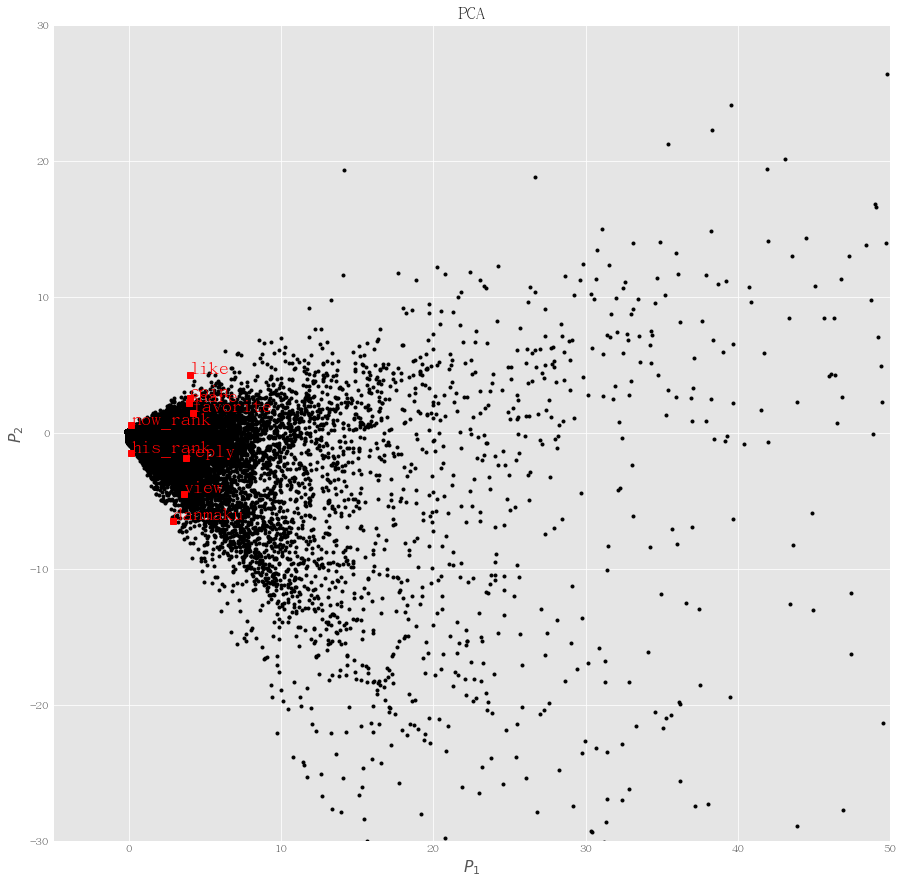

In [20]:
fig1 = plt.figure(figsize=(15,15))
ax = fig1.add_subplot(1,1,1)
ax.set_xlabel('$P_1$')
ax.set_ylabel('$P_2$')
ax.set_title('PCA')

plt.plot( plottingDf['principal component 1'].values, plottingDf['principal component 2'].values ,'k.')

plt.plot(10*pca.components_[0], 10*pca.components_[1],'rs')

bbox_props = dict(fc="white", ec="white", lw=1)
for i, txt in enumerate(features):
    ax.annotate(txt, (10*pca.components_[0][i], 10*pca.components_[1][i]), color='red', size=20)


plt.xlim([-5,50])
plt.ylim([-30,30])
# plt.show()
plt.savefig('bili-video-pca.png')

### K Means Clustering

In [35]:
kmeans = KMeans(n_clusters=4)

In [36]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [37]:
print(kmeans.cluster_centers_)  

[[-6.15473219e-03 -6.33723374e-03 -5.78721579e-03 -6.60031008e-03
  -4.93224267e-03 -5.38737444e-03 -1.92533114e-03 -1.84427866e-05
  -5.44683181e-03]
 [ 4.38752248e+01  4.63668417e+01  3.87570354e+01  4.40194788e+01
   2.88788678e+01  3.10265935e+01 -1.92533114e-03  1.52390544e-01
   3.19351957e+01]
 [ 1.12445348e+02  6.47845983e+01  2.19768207e+02  2.45544081e+02
   3.67177107e+02  4.30617878e+02  2.09199962e+00 -2.92824393e-01
   4.11639855e+02]
 [ 5.06981801e+00  2.98537190e+00  4.18050527e+00  1.48108707e+01
   9.83743883e+00  6.15833297e+00  4.93117401e+02 -2.23676110e-01
   4.77407845e+00]]


In [38]:
len(kmeans.labels_)

1027750